# Artificial Intelligence - Lab 2

In this laboratory we will explore the potential of the Perceptron with hidden layers, also named **Multi-Layer-Perceptron** (MLP). We will see how to create, train and easily evaluate this type of models by exploiting a Python library which offers high level functionality for machine learning: **Scikit-Learn**. Thanks to this library we will implement a MLP to solve diverse classification problems, such as the logical function XOR and more complex and realistic cases.

https://scikit-learn.org/stable/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

## The logic function XOR

As we have noted in the previous laboratory, a Perceptron is not able to solve the XOR problem because it is not linearly separable. To solve it we need to add at least one **hidden layer** of neurons with **non-linear activation function**, extending in this manner the capability of our model.

In [2]:
input_xor = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
target_xor = np.array([0,
                       1,
                       1,
                       0])

In Scikit-Learn both the model structure and the learning algorithm used to modify the weights are defined inside the class `MLPClassifier`. When we create a new *instance* of the class we need to specify the parameters which describe the model architecture (`hidden_layer_sizes`), the type of learning algorithm (`solver`), and its settings (`learning_rate_init`, `max_iter`, `random_state`).

The parameter `random_state` (which we will use also later on in the labs) serves to guarantee reproducibility of results that depend on random variables. Such parameter enables us to always obtain the same random numbers when we repeat a simulation.

For further information about the classes and available functions you are encouraged to consult the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) of Scikit-Learn.







In [3]:
random_state = 42  # the number 42 is arbitrary
MLP = MLPClassifier(hidden_layer_sizes=(8),   # number of hidden neurons
                    solver='sgd',             # optimizer (adam, sgd, lbfgs)
                    learning_rate_init=0.2,
                    max_iter=1000,
                    random_state=random_state)

In [4]:
MLP = MLP.fit(input_xor, target_xor.ravel())

By using the visualization library `matplotlib` we can plot the trend of the loss function during model training.

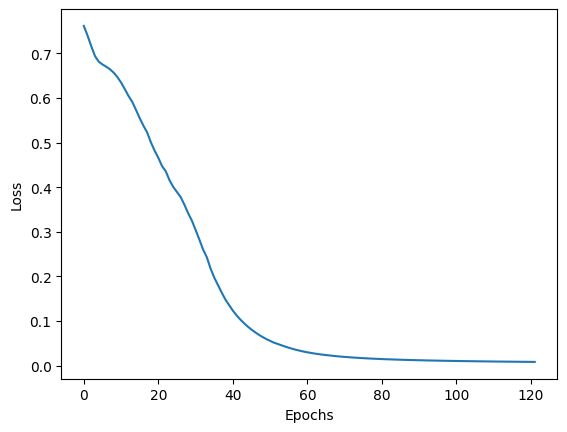

In [5]:
_ = plt.plot(range(MLP.n_iter_), MLP.loss_curve_)
plt.ylabel("Loss");
plt.xlabel("Epochs");

A popular measure of classifier preformance is **accuracy**, defined simply as the proportion of correct predictions over the total. The class `MLPClassifier` has a method `score` which allows to easily compute the predictive accuracy of the classifier on a dataset for evaluation.

In [6]:
MLP.score(input_xor, target_xor) #  computes mean accuracy (max = 1.0)

1.0

## The *heart disease* dataset

We now challenge our MLP classifier using a realistic dataset. We thus retrieve the *heart disease* dataset that we exploited also in the previous Lab. We now also evaluate model performance using the ROC curve and the confusion matrix.

In [7]:
%%capture
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [8]:
import pandas as pd                                   # used to load CSV files
from sklearn.model_selection import train_test_split  # used to automatically split the data into Training vs. Test sets
import sklearn.metrics as metrics                     # advanced evaluation metrics

In [9]:
heart_disease = pd.read_csv("processed.cleveland.data",
                            names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"],
                            na_values='?')
heart_disease = heart_disease.dropna()
heart_disease.num = heart_disease.num.apply(lambda x: 0 if x == 0 else 1)
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [10]:
heart_disease_samples = heart_disease.loc[:, "age":"thal"].to_numpy() # the first 13 columns represent the input
heart_disease_targets = heart_disease.num.to_numpy(dtype=np.float64)  # the last column represents the target

### Training

In this case we automatically partition the dataset into training and test set using the function `train_test_split`, which is included in the Scikit-Learn library. Also in this case it could be useful to consult the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [11]:
(x_tr, x_te, y_tr, y_te) = train_test_split(heart_disease_samples, heart_disease_targets, test_size = 0.1, random_state = 42)
tr_mean = x_tr.mean(axis=0)
tr_std = x_tr.std(axis=0)
x_tr_standardized = ((x_tr - tr_mean) / tr_std)
x_te_standardized = ((x_te - tr_mean) / tr_std)

By using only one hidden layer with 20 units we already obtain good results. By augmenting the number of hidden units we enlarge the expressive capabilities of the model and thus we might obtain even better results (but be careful with **overfitting**!). Also tuning other hyper-parameters might allow to improve model performance.

In [33]:
MLP = MLPClassifier(hidden_layer_sizes = (2),   # number of hidden neurons
                    solver = 'adam',             # optimizer (adam, sgd, lbfgs)
                    learning_rate_init = 0.001,   # initial learning rate
                    max_iter = 1000,             # maximum number of epochs
                    batch_size = 10,             # size of mini-batches
                    alpha = 0.001,               # L2 weight regularization (weight decay)
                    n_iter_no_change = 30,       # "patience" in early stopping
                    random_state = 42)

In [34]:
MLP = MLP.fit(x_tr_standardized, y_tr)

#### Loss function and accuracy

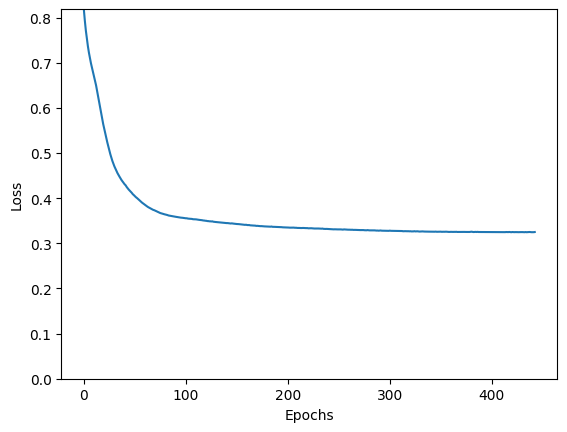

In [36]:
_ = plt.plot(range(MLP.n_iter_), MLP.loss_curve_)
plt.ylim([0, max(MLP.loss_curve_)]);
plt.ylabel("Loss");
plt.xlabel("Epochs");

In [37]:
print("Training accuracy: %.3f" % MLP.score(x_tr_standardized, y_tr))
print("Test accuracy: %.3f" % MLP.score(x_te_standardized, y_te))

Training accuracy: 0.850
Test accuracy: 0.867


#### ROC Curve

The ROC ([Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic/)) curve is a graphical tool used to evaluate binary classifiers. The idea is to observe how *true positives* and *false positives* percentages change due to the manipulation of the discriminatory threshold. From the same plot we can also measure the *Area under the curve* (AUC).

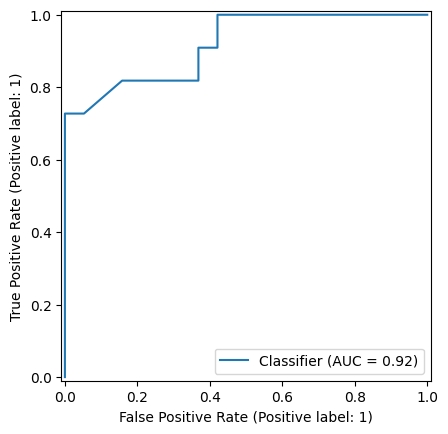

In [38]:
_ = metrics.RocCurveDisplay.from_predictions(y_te, MLP.predict_proba(x_te_standardized)[:, 1])

#### Confusion matrix

The confusion matrix is another useful tool for visualizing the classifier's errors, applicable also to multi-class classifiers. This technique allows us to understand in a detailed way the distribution of classification errors among the diverse classes.

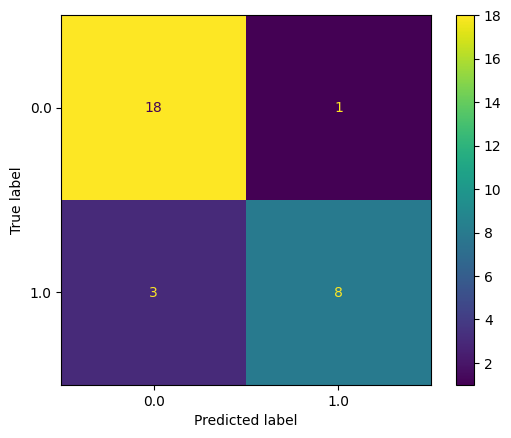

In [39]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_te, MLP.predict(x_te_standardized))

## **EXERCISE: Visualize the false positives and the false negatives samples wrongly recognized by the classifier.**

*Tip #1: first collect all model's predictions in a separate variable, then compare with ground truth labels to find FP and FN.*

*Tip #2: you can use either Python lists or Numpy arrays to store the samples; in the latter case you'll first need to initialize an empty array.*

In [56]:
prdtns = MLP.predict(x_te_standardized)

for (i, j) in zip(prdtns, y_te):
  print(f"prediction {round(i)}, y: {round(j)}")





prediction 0, y: 0
prediction 0, y: 1
prediction 0, y: 0
prediction 1, y: 1
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 1, y: 1
prediction 0, y: 0
prediction 0, y: 1
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 0, y: 0
prediction 1, y: 0
prediction 0, y: 1
prediction 0, y: 0
prediction 1, y: 1
prediction 1, y: 1
prediction 1, y: 1
prediction 0, y: 0
prediction 1, y: 1
prediction 0, y: 0
prediction 1, y: 1
prediction 1, y: 1
prediction 0, y: 0
prediction 0, y: 0


## The *breast cancer* dataset



We can exploit the same code to solve a different problem. For example, let's try the binary classification task of the [breast cancer](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) dataset.

In [57]:
%%capture
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [58]:
names = []
names += ["ID", "label"]
cell_features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]
for i in range(1, 4):
  names += [feature_name + f"_c{i}" for feature_name in cell_features]

In [59]:
breast_cancer = pd.read_csv("wdbc.data",
                            names=names,
                            na_values='?')
breast_cancer = breast_cancer.dropna()
breast_cancer = breast_cancer.drop(columns=["ID"])
breast_cancer.label = breast_cancer.label.apply(lambda x: 0 if x == "B" else 1)
breast_cancer.head()

,label,radius_c1,texture_c1,perimeter_c1,area_c1,smoothness_c1,compactness_c1,concavity_c1,concave_points_c1,symmetry_c1,...,radius_c3,texture_c3,perimeter_c3,area_c3,smoothness_c3,compactness_c3,concavity_c3,concave_points_c3,symmetry_c3,fractal_dimension_c3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
breast_cancer_samples = breast_cancer.loc[:, "radius_c1":"fractal_dimension_c3"].to_numpy()
breast_cancer_targets = breast_cancer.label.to_numpy()

#### Training

In [61]:
(x_tr, x_te, y_tr, y_te) = train_test_split(breast_cancer_samples, breast_cancer_targets)
tr_mean = x_tr.mean(axis=0)
tr_std = x_tr.std(axis=0)
x_tr = ((x_tr - tr_mean) / tr_std)
x_te = ((x_te - tr_mean) / tr_std)

In [62]:
random_state = 0
MLP = MLPClassifier(hidden_layer_sizes=(10),
                    solver='sgd', learning_rate_init=0.001,
                    max_iter=1000, random_state=random_state)

In [63]:
MLP = MLP.fit(x_tr, y_tr)

#### Loss function and accuracy

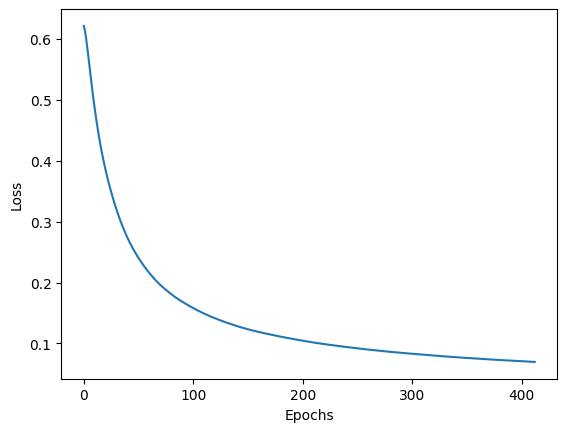

In [64]:
_ = plt.plot(range(MLP.n_iter_), MLP.loss_curve_)
plt.ylabel("Loss");
plt.xlabel("Epochs");

In [65]:
MLP.score(x_te, y_te)

0.9790209790209791

#### ROC curve

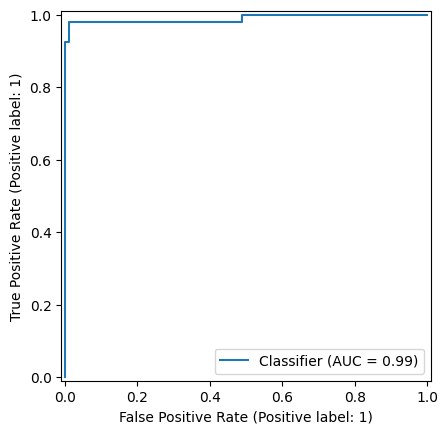

In [66]:
_ = metrics.RocCurveDisplay.from_predictions(y_te, MLP.predict_proba(x_te)[:, 1])

#### Confusion matrix

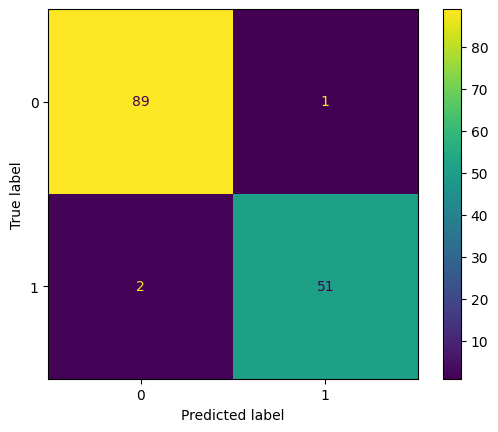

In [67]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_te, MLP.predict(x_te))